# Bit flipping game with DQN solver

This is the implementation of the DQN solver for the bit flipping game in [**Hindsight Experience Replay**](https://arxiv.org/abs/1707.01495).

**Rerefence**:

1. Marcin Andrychowicz, Filip Wolski, Alex Ray, Jonas Schneider, Rachel Fong, Peter Welinder, Bob McGrew, Josh Tobin, Pieter Abbeel, Wojciech Zaremba, Hindsight Experience Replay


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from bitflipping import bitflipping as bf
from DQN import DQN

plt.rcParams['figure.figsize'] = [15, 20]
%matplotlib inline



## Set up the bit flipping game environment

In [2]:
init_state = np.array([0,1])
goal = np.ones((2,))
n = 3
bf_env = bf(init_state, goal, n)

## Build up the DQN neural network

In [3]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=(None, 2*n))
y = tf.placeholder(tf.float32, shape=(None, 1))


hid = [256]
agent = DQN(x, hid, n, discount=0.98, eps=0.5, annealing=0.8, tau = 0.95, replay_buffer_size=1e6, batch_size=32)

In [4]:
losses, success_all = agent.train_Q(x, y, epoch=10, cycles = 25, episode=16, T=n, iteration=40)

Epoch 0 Cycle 0 Episode 15: loss is 0.0469
Epoch 0 Cycle 1 Episode 15: loss is 0.0453
Epoch 0 Cycle 2 Episode 15: loss is 0.0708
Epoch 0 Cycle 3 Episode 15: loss is 0.0564
Epoch 0 Cycle 4 Episode 15: loss is 0.0689
Epoch 0 Cycle 5 Episode 15: loss is 0.0609
Epoch 0 Cycle 6 Episode 15: loss is 0.0746
Epoch 0 Cycle 7 Episode 15: loss is 0.0602
Epoch 0 Cycle 8 Episode 15: loss is 0.0691
Epoch 0 Cycle 9 Episode 15: loss is 0.0947
Epoch 0 Cycle 10 Episode 15: loss is 0.0872
Epoch 0 Cycle 11 Episode 15: loss is 0.0921
Epoch 0 Cycle 12 Episode 15: loss is 0.0914
Epoch 0 Cycle 13 Episode 15: loss is 0.106
Epoch 0 Cycle 14 Episode 15: loss is 0.124
Epoch 0 Cycle 15 Episode 15: loss is 0.0822
Epoch 0 Cycle 16 Episode 15: loss is 0.123
Epoch 0 Cycle 17 Episode 15: loss is 0.103
Epoch 0 Cycle 18 Episode 15: loss is 0.115
Epoch 0 Cycle 19 Episode 15: loss is 0.0985
Epoch 0 Cycle 20 Episode 15: loss is 0.0947
Epoch 0 Cycle 21 Episode 15: loss is 0.116
Epoch 0 Cycle 22 Episode 15: loss is 0.106
Epoch

Epoch 7 Cycle 20 Episode 15: loss is 1.38
Epoch 7 Cycle 21 Episode 15: loss is 3.03
Epoch 7 Cycle 22 Episode 15: loss is 3.31
Epoch 7 Cycle 23 Episode 15: loss is 3.18
Epoch 7 Cycle 24 Episode 15: loss is 2.56
Epoch 8 Cycle 0 Episode 15: loss is 2.32
Epoch 8 Cycle 1 Episode 15: loss is 2.77
Epoch 8 Cycle 2 Episode 15: loss is 2.5
Epoch 8 Cycle 3 Episode 15: loss is 1.65
Epoch 8 Cycle 4 Episode 15: loss is 2.53
Epoch 8 Cycle 5 Episode 15: loss is 2.8
Epoch 8 Cycle 6 Episode 15: loss is 2.37
Epoch 8 Cycle 7 Episode 15: loss is 1.65
Epoch 8 Cycle 8 Episode 15: loss is 2.35
Epoch 8 Cycle 9 Episode 15: loss is 2.36
Epoch 8 Cycle 10 Episode 15: loss is 1.92
Epoch 8 Cycle 11 Episode 15: loss is 2.61
Epoch 8 Cycle 12 Episode 15: loss is 1.83
Epoch 8 Cycle 13 Episode 15: loss is 2.49
Epoch 8 Cycle 14 Episode 15: loss is 3.16
Epoch 8 Cycle 15 Episode 15: loss is 2.06
Epoch 8 Cycle 16 Episode 15: loss is 2.49
Epoch 8 Cycle 17 Episode 15: loss is 2.11
Epoch 8 Cycle 18 Episode 15: loss is 2.71
Epoc

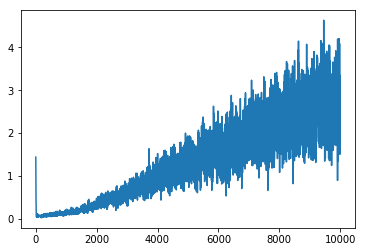

<function matplotlib.pyplot.show(*args, **kw)>

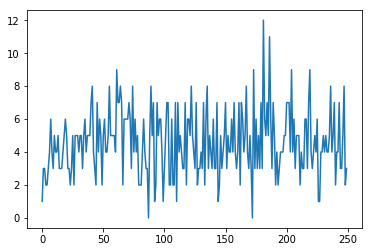

In [5]:
plt.figure()
plt.plot(losses)
plt.show()
plt.figure()
plt.plot(success_all)
plt.show

## Test DQN

In [11]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, '/tmp/model.ckpt')
    
    success = 0
    for i in range(100):
        
        s_0 = agent._sample_state()
        goal = agent._sample_state()
        while np.array_equal(s_0, goal):
            goal = agent._sample_state()

        env = bf(s_0, goal, n)

        for i in range(n):
            X = np.concatenate((env.state.reshape((1,-1)),goal.reshape((1,-1))), axis=1)
            Q = sess.run(agent.targetModel, feed_dict={x: X})
            action = np.argmax(Q)
            env.update_state(action)
            if (env.reward(env.state)==0):
                print('Success! Initial state:{0}\t Goal state:{1}'.format(s_0, goal))
                success += 1
                break
            elif (i==n-1):
                print('Fail! Initial state:{0}\t Goal state:{1}'.format(s_0, goal))
                
    print('Success rate {}%'.format(success))

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Fail! Initial state:[0 1 1]	 Goal state:[0 0 0]
Fail! Initial state:[1 1 1]	 Goal state:[0 0 1]
Fail! Initial state:[0 1 1]	 Goal state:[0 0 0]
Success! Initial state:[1 1 1]	 Goal state:[1 0 1]
Success! Initial state:[1 0 1]	 Goal state:[0 0 1]
Fail! Initial state:[1 0 1]	 Goal state:[0 0 0]
Fail! Initial state:[1 1 0]	 Goal state:[0 0 1]
Fail! Initial state:[0 0 0]	 Goal state:[1 0 0]
Fail! Initial state:[1 1 1]	 Goal state:[0 0 1]
Fail! Initial state:[0 1 0]	 Goal state:[0 1 1]
Success! Initial state:[1 1 0]	 Goal state:[0 0 0]
Fail! Initial state:[0 1 0]	 Goal state:[0 1 1]
Fail! Initial state:[0 0 1]	 Goal state:[1 1 1]
Fail! Initial state:[0 0 1]	 Goal state:[1 1 0]
Success! Initial state:[0 1 1]	 Goal state:[1 0 1]
Success! Initial state:[1 0 0]	 Goal state:[0 0 0]
Fail! Initial state:[1 0 1]	 Goal state:[1 1 1]
Fail! Initial state:[1 0 1]	 Goal state:[1 1 0]
Fail! Initial state:[0 1 1]	 Goal state:[0 0 1]
Fail! Initial s

In [7]:
a=np.array([[1,2,3,2,1,3]])

In [8]:
a.shape

(1, 6)

In [9]:
s=np.argmax(a)

In [10]:
s

2